In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df_origin = pd.read_csv('../Datasets/mobiles.csv')
df_origin

,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
1,Small,64,4,2,1,2815,4.5,244,57149,0.04,1.39
2,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
3,Medium,64,3,1,1,2942,4.6,5366,42999,0.10,23.07
4,Medium,128,4,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...
425,Small,32,3,2,1,4000,4.3,1870,7999,0.30,1.50
426,Small,64,4,2,1,4000,4.3,1783,9699,0.28,1.73
427,Large,128,6,3,1,4250,4.2,1554,21999,0.12,3.42
428,Medium,32,3,2,1,5000,4.2,8161,8299,0.07,6.77


# Q1

In [3]:
df1 = df_origin.copy()

<AxesSubplot:>

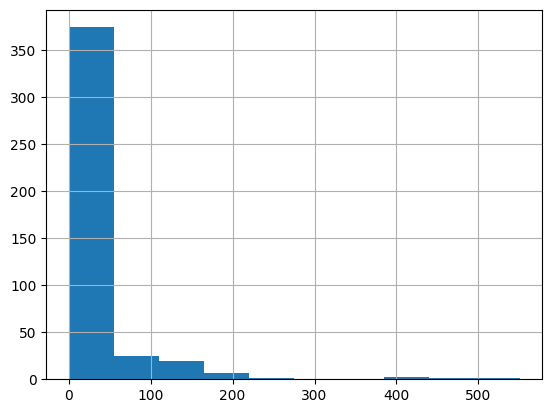

In [4]:
df1['sales'].hist()

In [5]:
stat_outlier = df1['sales'].mean() + 2 * df1['sales'].std()
stat_outlier

146.55150129273215

In [6]:
df1 = df1[df1['sales'] > stat_outlier]
df1

,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
98,Medium,128,6,2,1,4000,4.6,122001,18999,0.09,231.79
110,Large,128,6,4,2,4500,4.5,267028,15999,0.20,427.22
158,Large,32,2,2,1,5000,4.4,223672,7499,0.16,167.73
159,Large,32,2,2,1,5000,4.4,223672,7499,0.16,167.73
193,Medium,16,2,2,1,4000,4.4,226996,6499,0.07,147.52
198,Medium,32,2,2,1,4000,4.4,226996,6999,0.12,158.87
243,Medium,16,2,2,1,4000,4.4,226996,6499,0.07,147.52
381,Medium,64,4,2,2,4000,4.5,125016,12459,0.22,155.76
382,Medium,64,6,2,1,4000,4.5,129661,13500,0.20,175.04
395,Small,32,3,1,1,4100,4.4,642373,8565,0.04,550.19


In [10]:
performance_indicator = (df1['ROM'] / 32) + (df1['RAM'] / 2) + df1['num_front_camera'] + df1['num_rear_camera'] + (df1['battery_capacity'] / 1000)
performance_indicator

98     14.00
110    17.50
158    10.00
159    10.00
193     8.50
198     9.00
243     8.50
381    12.00
382    12.00
395     8.60
396    10.00
402    11.00
404    12.00
407    12.00
412    11.00
418    10.08
dtype: float64

In [12]:
performance_indicator.mean().round(2)

11.01

In [17]:
from sklearn.preprocessing import StandardScaler
df11 = df_origin.copy()
scaler_std = StandardScaler()
df_t = df11[scaler_std.fit_transform(df11[['sales']]) > 2]

performance_indicator = (df_t['ROM'] / 32) + (df_t['RAM'] / 2) + df_t['num_front_camera'] + df_t['num_rear_camera'] + (df_t['battery_capacity'] / 1000)
performance_indicator

performance_indicator.mean().round(2)

11.01

# Q2

In [19]:
df2 = df_origin.copy()
df2

,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
1,Small,64,4,2,1,2815,4.5,244,57149,0.04,1.39
2,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
3,Medium,64,3,1,1,2942,4.6,5366,42999,0.10,23.07
4,Medium,128,4,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...
425,Small,32,3,2,1,4000,4.3,1870,7999,0.30,1.50
426,Small,64,4,2,1,4000,4.3,1783,9699,0.28,1.73
427,Large,128,6,3,1,4250,4.2,1554,21999,0.12,3.42
428,Medium,32,3,2,1,5000,4.2,8161,8299,0.07,6.77


In [20]:
df2 = df2[df2['num_rear_camera'] != 1]
df2

,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
1,Small,64,4,2,1,2815,4.5,244,57149,0.04,1.39
4,Medium,128,4,2,1,2815,4.6,745,69149,0.02,5.15
5,Medium,64,4,2,1,2815,4.6,745,64149,0.02,4.78
6,Medium,128,4,2,1,2815,4.6,745,69149,0.02,5.15
7,Medium,64,4,2,1,2815,4.6,745,64149,0.02,4.78
...,...,...,...,...,...,...,...,...,...,...,...
425,Small,32,3,2,1,4000,4.3,1870,7999,0.30,1.50
426,Small,64,4,2,1,4000,4.3,1783,9699,0.28,1.73
427,Large,128,6,3,1,4250,4.2,1554,21999,0.12,3.42
428,Medium,32,3,2,1,5000,4.2,8161,8299,0.07,6.77


In [21]:
df2.columns

Index(['screen_size', 'ROM', 'RAM', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [24]:
col2 = df2.loc[:, 'battery_capacity':].columns

In [26]:
df2[col2].corr()['sales'][:-1].abs().round(2).max()

0.95

# Q3

In [91]:
df3 = df_origin.copy()
df3

,screen_size,ROM,RAM,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
1,Small,64,4,2,1,2815,4.5,244,57149,0.04,1.39
2,Very Small,64,2,1,1,1800,4.5,38645,32999,0.17,127.52
3,Medium,64,3,1,1,2942,4.6,5366,42999,0.10,23.07
4,Medium,128,4,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...
425,Small,32,3,2,1,4000,4.3,1870,7999,0.30,1.50
426,Small,64,4,2,1,4000,4.3,1783,9699,0.28,1.73
427,Large,128,6,3,1,4250,4.2,1554,21999,0.12,3.42
428,Medium,32,3,2,1,5000,4.2,8161,8299,0.07,6.77


In [92]:
seed = 123
tSize = 0.2

In [93]:
X = df3.drop(columns='sales')
y = df3['sales']

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=tSize, random_state=seed)

In [95]:
col_cate = X_train.select_dtypes(include='object').columns
col_num  = X_train.select_dtypes(include='number').columns

In [96]:
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train[col_num])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [97]:
X_train_num = scaler_mm.transform(X_train[col_num])
X_test_num = scaler_mm.transform(X_test[col_num])

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
ohe = OneHotEncoder(handle_unknown='ignore') # 

In [100]:
X_train_cate = ohe.fit_transform(X_train[col_cate])
X_test_cate = ohe.fit_transform(X_test[col_cate])

In [101]:
X_train_cate

<344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 344 stored elements in Compressed Sparse Row format>

In [102]:
X_train_cate.shape[1] + X_train_num.shape[1]

14

In [103]:
from scipy import sparse

In [104]:
X_train = sparse.hstack([X_train_cate, X_train_num])

In [105]:
X_test = sparse.hstack([X_test_cate, X_test_num])

In [106]:
k_values = [3,5,7,9,11]

In [107]:
scores = {}
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[k] = mean_squared_error(y_test, y_pred)

scores

{3: 1635.4379954780363,
 5: 2381.520687627907,
 7: 2828.8309384907457,
 9: 3078.5168532443304,
 11: 3154.0245733999623}

In [87]:
sorted(scores.items(), key=lambda x : x[1])

[(3, 1839.1559397932822),
 (5, 2580.0231073023256),
 (7, 2976.284701423825),
 (9, 3076.630082041345),
 (11, 3310.881364049587)]

# Q3 - 꼼수

In [108]:
df4 = df_origin.copy()

In [110]:
df_dummy = pd.get_dummies(df4)

In [111]:
X = df_dummy.drop(columns='sales')
y = df_dummy['sales']

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=tSize, random_state=seed)

In [114]:
scores = {}
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[k] = mean_squared_error(y_test, y_pred)

scores

D:\anaconda\envs\samsung374\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
D:\anaconda\envs\samsung374\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
D:\anaconda\envs\samsung374\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
D:\anaconda\envs\samsung374\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
D:\anaconda\envs\samsung374\lib\site-packages\sklear

{3: 172.834669509044,
 5: 651.971051906977,
 7: 921.234803251068,
 9: 1107.8877232271034,
 11: 1201.8696972996347}